In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gymnasium
from datetime import datetime

In [2]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Tidak ada data duplicate

In [5]:
to_drop=['InvoiceNo']
df.drop(to_drop, inplace=True, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    536641 non-null  object 
 1   Description  535187 non-null  object 
 2   Quantity     536641 non-null  int64  
 3   InvoiceDate  536641 non-null  object 
 4   UnitPrice    536641 non-null  float64
 5   CustomerID   401604 non-null  float64
 6   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 32.8+ MB


In [49]:
df.isna()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False
49,False,False,False,False,False,False,False
66,False,False,False,False,False,False,False
220,False,False,False,False,False,False,False
262,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
537291,False,False,False,False,False,False,False
537326,False,False,False,False,False,False,False
537852,False,False,False,False,False,False,False
539979,False,False,False,False,False,False,False


In [50]:
df.dropna(axis=0, inplace=True)

In [51]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

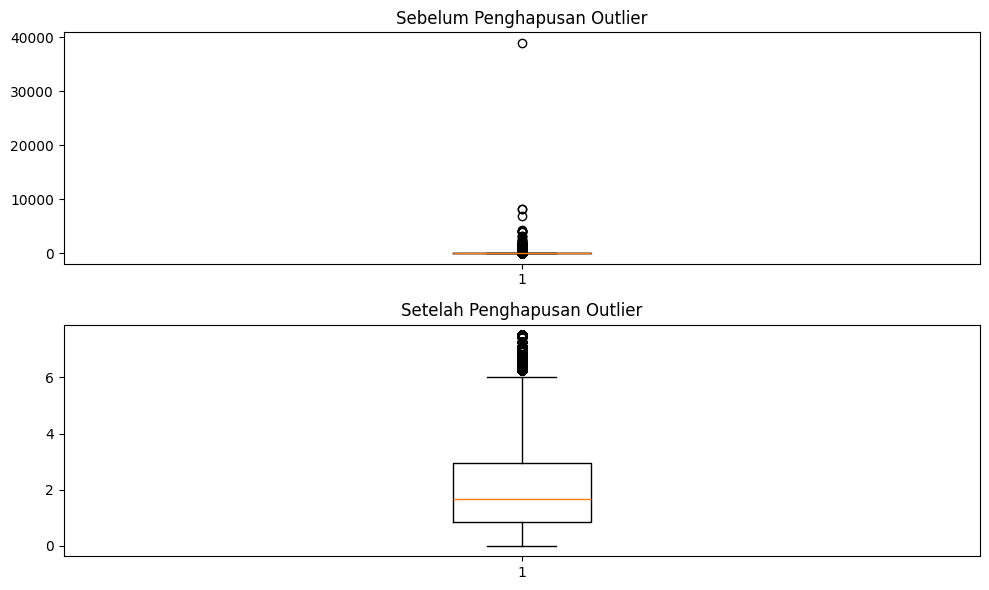

In [20]:
# Menghitung IQR
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

# Batas atas dan bawah untuk outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identifikasi outlier
outlier_indices = df[(df['UnitPrice'] < lower_limit) | (df['UnitPrice'] > upper_limit)].index

# Hapus baris yang mengandung outlier
df_cleaned = df.drop(outlier_indices)

# Visualisasi sebelum dan setelah penghapusan outlier
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(df['UnitPrice'])
plt.title("Sebelum Penghapusan Outlier")

plt.subplot(2, 1, 2)
plt.boxplot(df_cleaned['UnitPrice'])
plt.title("Setelah Penghapusan Outlier")

plt.tight_layout()
plt.show()

In [21]:
print(df_cleaned.head())

  StockCode                          Description  Quantity  \
0    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     71053                  WHITE METAL LANTERN         6   
2    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [52]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [53]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
Name: count, dtype: int64

In [28]:
df1 = df[df['Description'].isin(['WHITE HANGING HEART T-LIGHT HOLDER'])]

In [30]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,2357.000000,2357,2357.000000,2058.000000
mean,14.975817,2011-06-06 19:13:22.681374464,3.205545,15562.338192
min,-1930.000000,2010-12-01 08:26:00,0.000000,12370.000000
25%,3.000000,2011-03-03 14:43:00,2.950000,14239.000000
50%,6.000000,2011-05-29 14:23:00,2.950000,15601.000000
75%,12.000000,2011-09-19 10:51:00,2.950000,16931.000000
max,1930.000000,2011-12-08 19:55:00,6.770000,18283.000000
std,82.084142,NaN,0.993040,1615.571342


In [31]:
df1.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
49,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
66,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
220,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom
262,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom


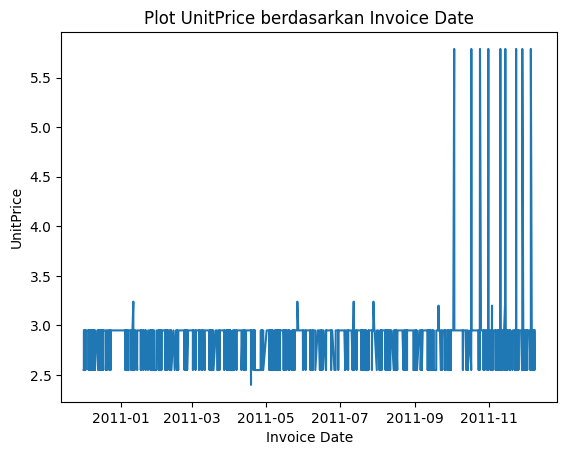

In [54]:
plt.plot(df['InvoiceDate'], df['UnitPrice'])
plt.xlabel('Invoice Date')
plt.ylabel('UnitPrice')
plt.title('Plot UnitPrice berdasarkan Invoice Date')
plt.show()

In [2]:
env = gymnasium.make("Taxi-v3", render_mode="ansi")
env.reset()
env.render()

'+---------+\n|\x1bR\x1b: | : :\x1bG\x1b|\n| : | : : |\n| : : : : |\n| | : | : |\n|Y| : |\x1bB\x1b: |\n+---------+\n\n'

In [4]:
env.reset() # reset environment to a new, random state
env.render()
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


In [5]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 328


C:\Users\fadhl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.encode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.encode` for environment variables or `env.get_wrapper_attr('encode')` that will search the reminding wrappers.
  logger.warn(


'+---------+\n|\x1bR\x1b: | : :G|\n| : | : : |\n| : : : : |\n|\x1b \x1b| : | : |\n|Y| : |\x1bB\x1b: |\n+---------+\n\n'

In [6]:
env.P[328]

C:\Users\fadhl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [7]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [8]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

In [9]:
frames = [] # for animation

In [ ]:
done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

: 

In [10]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'].getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)